In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


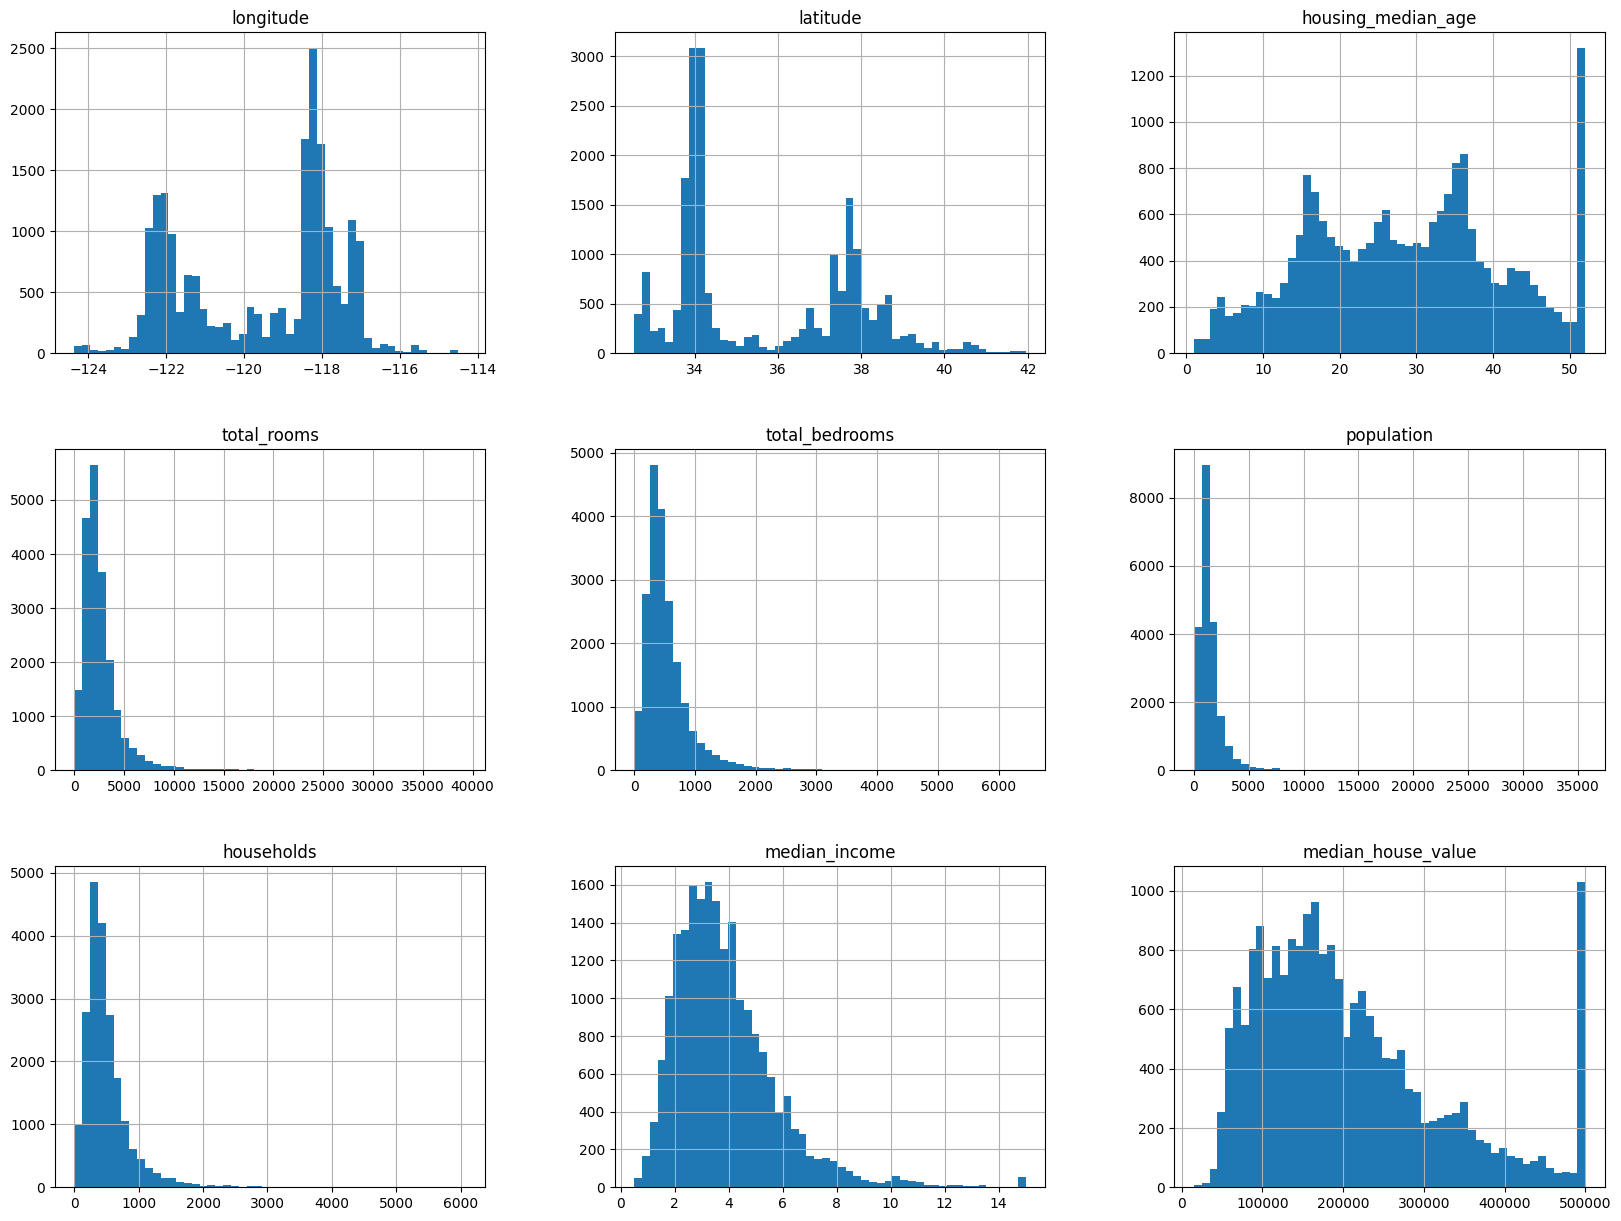

In [4]:
import matplotlib.pyplot as plt
data.hist(bins = 50, figsize = (20,15))
plt.show()

In [5]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [50]:
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].median())

In [51]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
income_cat            0
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size = 0.2, random_state = 42)
print(f"Train set size: {len(train_set)}")
print(f"Test set size: {len(test_set)}")

Train set size: 16512
Test set size: 4128


In [9]:
data['ocean_proximity'].nunique()

5

In [10]:
data["income_cat"] = np.ceil(data["median_income"] / 1.5)
data["income_cat"] = data["income_cat"].where(data["income_cat"] < 5, 5.0)

In [11]:
#Stratified Sampling
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(data, data["income_cat"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [12]:
data["income_cat"].value_counts() / len(data)

income_cat
3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: count, dtype: float64

In [13]:
#reverting the data into its original form
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis = 1, inplace = True)

In [14]:
#making a copy
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

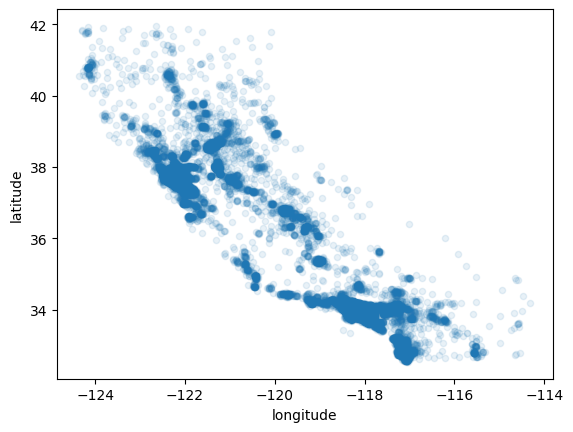

In [15]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1)

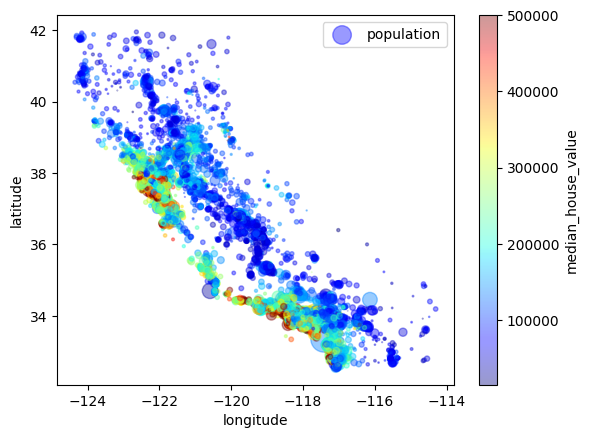

In [16]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population",
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [17]:
#Looking for correlations

corr_matrix = housing.drop("ocean_proximity", axis = 1).corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047732
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

<Axes: xlabel='median_income', ylabel='median_house_value'>

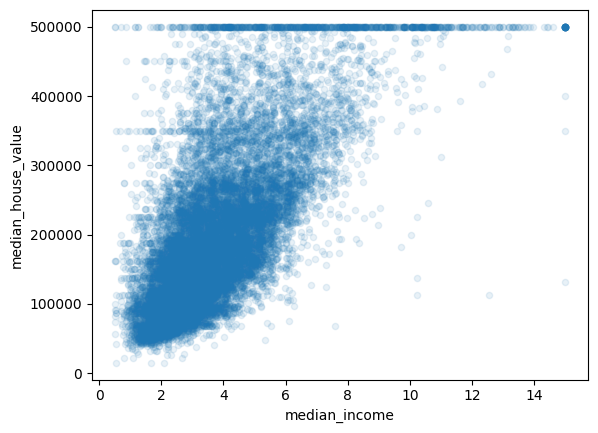

In [18]:
#the most promising attribute to predict house price is median_income, as corr is near 1
housing.plot(kind="scatter", x="median_income", y="median_house_value",
 alpha=0.1)


In [19]:
#Preparing data for ML Algo
#Separating predictors and labels
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()


In [20]:
#Data cleaning
#TO resolve missing attributes
#housing.dropna(subset=["total_bedrooms"]) # option 1
#housing.drop("total_bedrooms", axis=1) # option 2
#median = housing["total_bedrooms"].median()
#housing["total_bedrooms"].fillna(median) # option 3

#better way is to ise sckit-learn imputer

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")
#This only works on numerical attributes so we drop the ocean_proximity 
housing_num = housing.drop("ocean_proximity", axis = 1)

imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [21]:
#The imputer has simply computed the median of each attribute and stored the result
#in its statistics_ instance variable.
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  435.     ,
       1164.     ,  408.     ,    3.54155])

In [22]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  435.     ,
       1164.     ,  408.     ,    3.54155])

In [23]:
#Using trained imputer to transform training set
X = imputer.transform(housing_num)

In [24]:
#handling categorical attributes
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded
                                

array([1, 4, 1, ..., 0, 0, 1])

In [25]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [26]:
from sklearn.preprocessing import OneHotEncoder
#Binary encoding ie 1 for ocean and 0 for inland
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [27]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [28]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
     def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
         self.add_bedrooms_per_room = add_bedrooms_per_room
     def fit(self, X, y=None):
         return self # nothing else to do
     def transform(self, X, y=None):
         rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
         population_per_household = X[:, population_ix] / X[:, household_ix]
         if self.add_bedrooms_per_room:
             bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
             return np.c_[X, rooms_per_household, population_per_household,
 bedrooms_per_room]
         else:
             return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
#using pipelining for data transformation, scaling
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion

class DataFrameSelector(BaseEstimator, TransformerMixin):
     def __init__(self, attribute_names):
         self.attribute_names = attribute_names
     def fit(self, X, y=None):
         return self
     def transform(self, X):
         return X[self.attribute_names].values


num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
num_pipeline = Pipeline([
     ('selector', DataFrameSelector(num_attribs)),
     ('imputer', SimpleImputer(strategy="median")),
     ('attribs_adder', CombinedAttributesAdder()),
     ('std_scaler', StandardScaler()),
 ])
cat_pipeline = Pipeline([
     ('selector', DataFrameSelector(cat_attribs)),
     ('one_hot_binarizer', OneHotEncoder()),
     ])
full_pipeline = FeatureUnion(transformer_list=[
     ("num_pipeline", num_pipeline),
     ("cat_pipeline", cat_pipeline),
 ])
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.shape

(16512, 16)

In [29]:
#Training a model, First Linear Regression

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [30]:
#Testing
s_d = housing.iloc[:5]
s_l = housing_labels.iloc[:5]
s_d_p = full_pipeline.transform(s_d)
print("Predictions: \t", lin_reg.predict(s_d_p))
print("Labels: \t", list(s_l))

Predictions: 	 [ 85670.05379405 305486.19653236 152068.18154281 186081.42691571
 244565.39473966]
Labels: 	 [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [31]:
#Evaluating using RMSE
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(68630.06009149272)

This is not a good score. This is an example of model underfitting, the features do not provide enough info

In [32]:
#Using RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
#parameters are passed so as to reduce the forest to less depth and estimators
forest_reg = RandomForestRegressor(n_estimators=50, max_depth=15, max_features='log2', n_jobs=-1)
forest_reg.fit(housing_prepared, housing_labels)
forest_reg_predictions = forest_reg.predict(housing_prepared)
print(forest_reg_predictions)
forest_mse = mean_squared_error(housing_labels, forest_reg_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

[ 79588.45543629 299385.84231674  82117.49259755 ... 158693.11322571
 248817.42941235  82821.00554459]


np.float64(26196.27641311193)

This is much better score, than Linear Regression, but still the score is still overfitting

Fine Tuning the model using Grid Search

In [33]:
from sklearn.model_selection import GridSearchCV
#Hyperparameters to try with
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]
forest_reg = RandomForestRegressor(n_estimators=50, max_depth=15, max_features='log2', n_jobs=-1)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=15, max_features='log2',
                                             n_estimators=50, n_jobs=-1),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [34]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [35]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

62238.59126337471 {'max_features': 2, 'n_estimators': 3}
55354.49879134242 {'max_features': 2, 'n_estimators': 10}
53750.28712469685 {'max_features': 2, 'n_estimators': 30}
59711.48249284252 {'max_features': 4, 'n_estimators': 3}
52738.87239823818 {'max_features': 4, 'n_estimators': 10}
50788.70927991561 {'max_features': 4, 'n_estimators': 30}
58940.41843828404 {'max_features': 6, 'n_estimators': 3}
52437.38804931571 {'max_features': 6, 'n_estimators': 10}
50298.63228157182 {'max_features': 6, 'n_estimators': 30}
57378.525759217235 {'max_features': 8, 'n_estimators': 3}
52181.96594878877 {'max_features': 8, 'n_estimators': 10}
50634.88079524474 {'max_features': 8, 'n_estimators': 30}
60719.783532564645 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54645.40159726867 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59517.719318437325 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52776.27566430258 {'bootstrap': False, 'max_features': 3, 'n_estimators':

Setting max features to 6 and n_estimators to 30 gives us the rmse score of 50177 which is much better

Analyzing best mode and errors

In [36]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.09143075e-02, 6.55078565e-02, 4.07284243e-02, 1.48347845e-02,
       1.44165251e-02, 1.46451646e-02, 1.45395616e-02, 3.51357298e-01,
       5.38026291e-02, 1.05837155e-01, 6.92672352e-02, 7.47132884e-03,
       1.71215574e-01, 1.92570042e-05, 2.57164727e-03, 2.87125187e-03])

In [38]:
#Displaying with corresponding attributes

In [45]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.categories_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse = True)

[(np.float64(0.3513572977334249), 'median_income'),
 (np.float64(0.10583715512004412), 'pop_per_hhold'),
 (np.float64(0.07091430754514523), 'longitude'),
 (np.float64(0.06926723519663915), 'bedrooms_per_room'),
 (np.float64(0.06550785651533286), 'latitude'),
 (np.float64(0.053802629130800056), 'rooms_per_hhold'),
 (np.float64(0.04072842425298214), 'housing_median_age'),
 (np.float64(0.01483478449105685), 'total_rooms'),
 (np.float64(0.014645164579414529), 'population'),
 (np.float64(0.014539561643247644), 'households'),
 (np.float64(0.014416525083996969), 'total_bedrooms'),
 (np.float64(0.007471328838880544), array([0, 1, 2, 3, 4]))]

Evaluating on Test Set

In [49]:
final_model = grid_search.best_estimator_
X_test =  strat_test_set.drop("median_house_value", axis = 1)
Y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

48685.146701133024
